**Mounting to Drive**

In [1]:
import os
os.getcwd()

'/content'

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Classroom/VIT-Bangalore/TrimesterProjects/MaternalRiskAnalysis')

In [4]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

**Loading the Data**

In [5]:
import pandas as pd

# Define the correct file path
file_path = '/content/drive/MyDrive/Classroom/VIT-Bangalore/TrimesterProjects/MaternalRiskAnalysis/Maternal Health Risk Data Set.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [7]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [8]:
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [9]:
# Load the dataset
file_path = "/content/drive/MyDrive/Classroom/VIT-Bangalore/TrimesterProjects/MaternalRiskAnalysis/Maternal Health Risk Data Set.csv"
data = pd.read_csv(file_path)

# Step 1: Define the labor indicators function
def labor_indicators(row):
    indicators = {
        'Hypertension': 0,
        'Blood Sugar Issue': 0,
        'Abnormal Body Temperature': 0,
        'High Heart Rate': 0
    }

    # Hypertension indicator
    if row['SystolicBP'] > 140 or row['DiastolicBP'] > 90:
        indicators['Hypertension'] = 1

    # Hypoglycemia or Hyperglycemia indicator (assuming BS < 7 or BS > 15 as abnormal)
    if row['BS'] < 7 or row['BS'] > 15:
        indicators['Blood Sugar Issue'] = 1

    # Abnormal body temperature
    if row['BodyTemp'] > 100.4:
        indicators['Abnormal Body Temperature'] = 1

    # Tachycardia (High heart rate)
    if row['HeartRate'] > 85:
        indicators['High Heart Rate'] = 1

    return pd.Series(indicators)

# Step 2: Define the labor type determination function
def determine_labor_type(row):
    # Criteria for True Labor (any of the indicators being true)
    if (row['Hypertension'] == 1 or
        row['Blood Sugar Issue'] == 1 or
        row['Abnormal Body Temperature'] == 1 or
        row['High Heart Rate'] == 1):
        return 'True Labor'
    else:
        return 'Braxton Hicks'

# Step 3: Apply the labor indicators function to create separate columns
indicator_columns = data.apply(labor_indicators, axis=1)

# Step 4: Merge the new indicator columns with the original dataset
data = pd.concat([data, indicator_columns], axis=1)

# Step 5: Apply the labor type determination function to create the 'Labor Type' column
data['Labor Type'] = data.apply(determine_labor_type, axis=1)

# Step 6: Verify the updated dataset
print(data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
            'Hypertension', 'Blood Sugar Issue', 'Abnormal Body Temperature',
            'High Heart Rate', 'Labor Type']].head())

# Optionally, save the updated dataset to a new CSV file
# data.to_csv("/content/drive/MyDrive/VIT-Bangalore/TrimesterProjects/MaternalRiskAnalysis/Maternal_Health_Updated_Indicators.csv", index=False)


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  Hypertension  \
0   25         130           80  15.0      98.0         86             0   
1   35         140           90  13.0      98.0         70             0   
2   29          90           70   8.0     100.0         80             0   
3   30         140           85   7.0      98.0         70             0   
4   35         120           60   6.1      98.0         76             0   

   Blood Sugar Issue  Abnormal Body Temperature  High Heart Rate  \
0                  0                          0                1   
1                  0                          0                0   
2                  0                          0                0   
3                  0                          0                0   
4                  1                          0                0   

      Labor Type  
0     True Labor  
1  Braxton Hicks  
2  Braxton Hicks  
3  Braxton Hicks  
4     True Labor  


**Data Preprocessing**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (1014, 12)


In [12]:
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  Hypertension  Blood Sugar Issue  \
count  1014.000000   1014.000000        1014.000000   
mean     74.301775      0.121302           0.390533   
std       8.088702      0.326639           0.488110   
min       7.000000      0.000000           0.000000   
25%      70.000

In [13]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Age                          0
SystolicBP                   0
DiastolicBP                  0
BS                           0
BodyTemp                     0
HeartRate                    0
RiskLevel                    0
Hypertension                 0
Blood Sugar Issue            0
Abnormal Body Temperature    0
High Heart Rate              0
Labor Type                   0
dtype: int64


In [14]:
print("\nData Types of Columns:")
print(data.dtypes)


Data Types of Columns:
Age                            int64
SystolicBP                     int64
DiastolicBP                    int64
BS                           float64
BodyTemp                     float64
HeartRate                      int64
RiskLevel                     object
Hypertension                   int64
Blood Sugar Issue              int64
Abnormal Body Temperature      int64
High Heart Rate                int64
Labor Type                    object
dtype: object


In [15]:
print("\nDistribution of Labor Type:")
print(data['Labor Type'].value_counts())


Distribution of Labor Type:
Labor Type
True Labor       630
Braxton Hicks    384
Name: count, dtype: int64


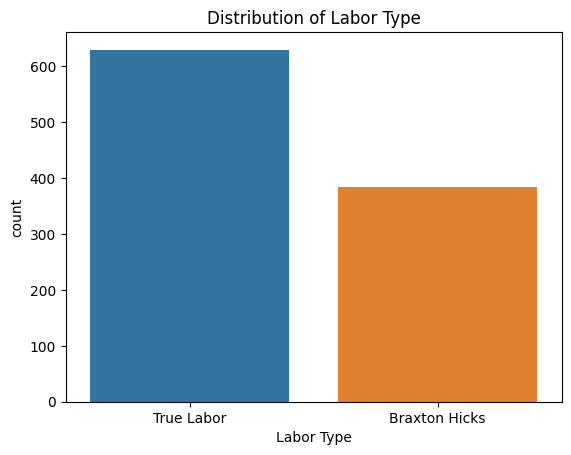

In [16]:
# Plot the distribution of Labor Type
sns.countplot(data=data, x='Labor Type', hue = 'Labor Type')
plt.title('Distribution of Labor Type')
plt.show()

In [17]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 562


In [18]:
# Removing duplicates if necessary
data = data.drop_duplicates()

In [19]:
print("Shape: ", data.shape)

Shape:  (452, 12)


In [20]:
print("Head: ", data.head())

Head:     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86  high risk   
1   35         140           90  13.0      98.0         70  high risk   
2   29          90           70   8.0     100.0         80  high risk   
3   30         140           85   7.0      98.0         70  high risk   
4   35         120           60   6.1      98.0         76   low risk   

   Hypertension  Blood Sugar Issue  Abnormal Body Temperature  \
0             0                  0                          0   
1             0                  0                          0   
2             0                  0                          0   
3             0                  0                          0   
4             0                  1                          0   

   High Heart Rate     Labor Type  
0                1     True Labor  
1                0  Braxton Hicks  
2                0  Braxton Hicks  
3                0 

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'data' is your existing DataFrame

# Initialize LabelEncoder for categorical columns
label_encoder = LabelEncoder()

# Encode categorical columns to numeric
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])  # 'high risk' -> 1, 'low risk' -> 0
data['Labor Type'] = label_encoder.fit_transform(data['Labor Type'])  # 'True Labor' -> 1, 'Braxton Hicks' -> 0

# Separate features (X) and target variable (y)
X = data.drop(columns=['Labor Type'])  # Drop the target column
y = data['Labor Type']  # The target is 'Labor Type'

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Create a new DataFrame with the synthetic data
data_augmented = pd.DataFrame(X_res, columns=X.columns)

# Add the target column back to the augmented data
data_augmented['Labor Type'] = y_res

# Show the shapes of the original and augmented datasets
print(f"Original Shape: {data.shape}")
print(f"Augmented Shape: {data_augmented.shape}")

# Concatenate the original and augmented datasets
data_combined = pd.concat([data, data_augmented], axis=0).reset_index(drop=True)

# Display the combined dataset shape and a preview of the first few rows
print(f"Combined Shape: {data_combined.shape}")
print(data_combined.head())

# Save the combined dataset if needed
# data_combined.to_csv("/content/drive/MyDrive/VIT-Bangalore/TrimesterProjects/MaternalRiskAnalysis/Maternal_Health_Combined.csv", index=False)


Original Shape: (452, 12)
Augmented Shape: (546, 12)
Combined Shape: (998, 12)
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86          0   
1   35         140           90  13.0      98.0         70          0   
2   29          90           70   8.0     100.0         80          0   
3   30         140           85   7.0      98.0         70          0   
4   35         120           60   6.1      98.0         76          1   

   Hypertension  Blood Sugar Issue  Abnormal Body Temperature  \
0             0                  0                          0   
1             0                  0                          0   
2             0                  0                          0   
3             0                  0                          0   
4             0                  1                          0   

   High Heart Rate  Labor Type  
0                1           1  
1                0       

In [22]:
data = data_combined.copy()
print("Head: \n")
data.head()
print("\n")
print("Shape: ", data.shape)

Head: 



Shape:  (998, 12)


Missing values in each column:
Age                          0
SystolicBP                   0
DiastolicBP                  0
BS                           0
BodyTemp                     0
HeartRate                    0
RiskLevel                    0
Hypertension                 0
Blood Sugar Issue            0
Abnormal Body Temperature    0
High Heart Rate              0
Labor Type                   0
dtype: int64


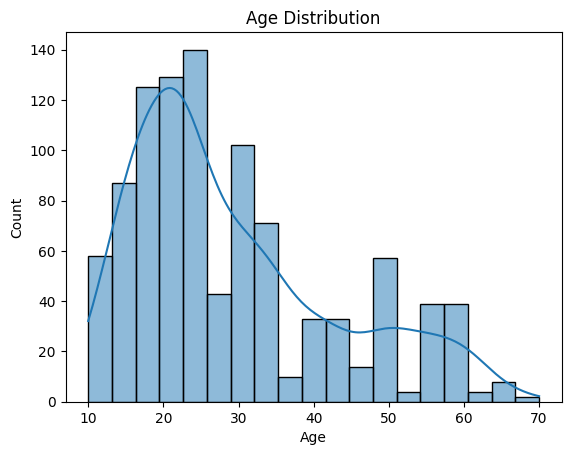

Systolic Blood Pressure stats:
count    998.000000
mean     110.616232
std       17.723555
min       70.000000
25%       90.000000
50%      120.000000
75%      120.000000
max      160.000000
Name: SystolicBP, dtype: float64
Diastolic Blood Pressure stats:
count    998.000000
mean      75.460922
std       13.542384
min       49.000000
25%       65.000000
50%       80.000000
75%       85.000000
max      100.000000
Name: DiastolicBP, dtype: float64


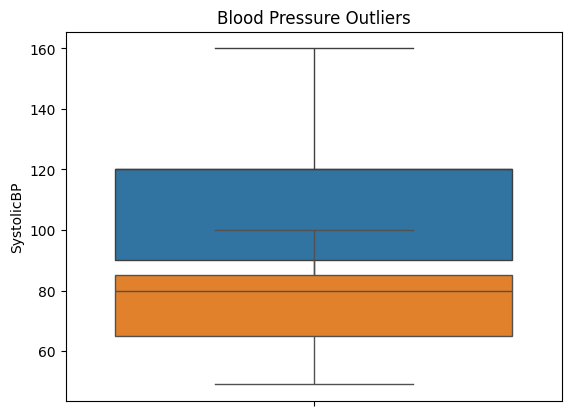

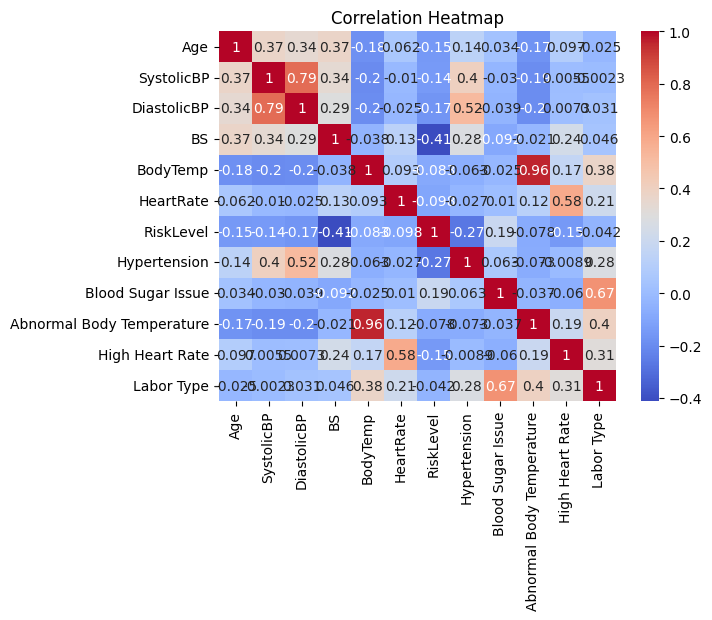

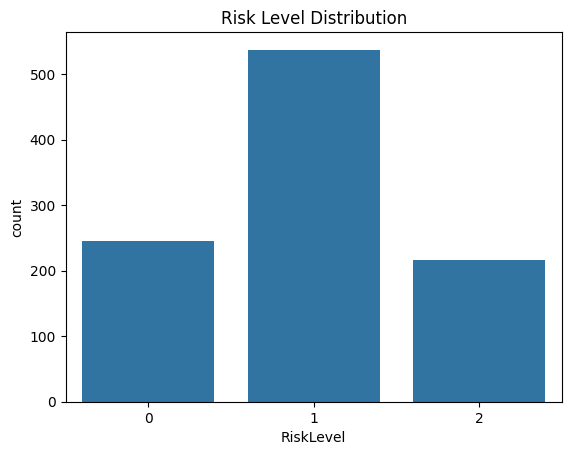

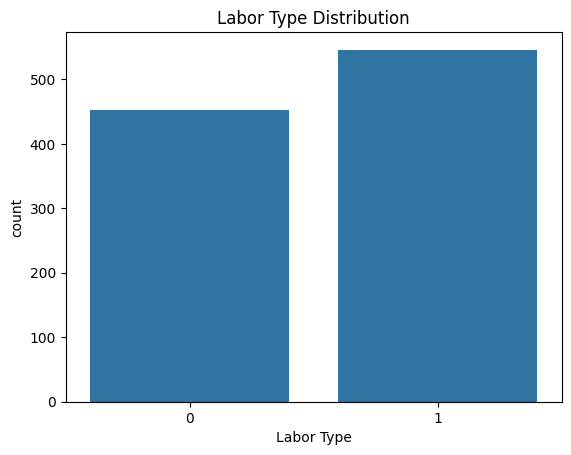

RiskLevel value counts:
RiskLevel
1    537
0    245
2    216
Name: count, dtype: int64
Labor Type value counts:
Labor Type
1    546
0    452
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Plot distribution of Age
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Check for Blood Pressure values in normal ranges
print("Systolic Blood Pressure stats:")
print(data['SystolicBP'].describe())
print("Diastolic Blood Pressure stats:")
print(data['DiastolicBP'].describe())

# Check for extreme outliers in Blood Pressure
sns.boxplot(data['SystolicBP'])
sns.boxplot(data['DiastolicBP'])
plt.title('Blood Pressure Outliers')
plt.show()

# Check correlation between Blood Pressure, Body Temp, and Risk Level
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Check the balance of the RiskLevel and Labor Type columns
sns.countplot(x='RiskLevel', data=data)
plt.title('Risk Level Distribution')
plt.show()

sns.countplot(x='Labor Type', data=data)
plt.title('Labor Type Distribution')
plt.show()

# Ensure that RiskLevel and Labor Type distributions are reasonable
print("RiskLevel value counts:")
print(data['RiskLevel'].value_counts())

print("Labor Type value counts:")
print(data['Labor Type'].value_counts())


In [24]:
# Check unique values in each column of the dataset
unique_values = data.nunique()

# Print the number of unique values for each column
print(unique_values)

Age                           51
SystolicBP                    26
DiastolicBP                   29
BS                           111
BodyTemp                      12
HeartRate                     23
RiskLevel                      3
Hypertension                   2
Blood Sugar Issue              2
Abnormal Body Temperature      2
High Heart Rate                2
Labor Type                     2
dtype: int64


In [25]:
# Display unique values for each column
for column in data.columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())
    print("\n")

Unique values in column 'Age':
[25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46 58]


Unique values in column 'SystolicBP':
[130 140  90 120  85 110  70 100  75  95  76  80 115 135 160 129  83  99
  78  97 119  79 137 113  96  71]


Unique values in column 'DiastolicBP':
[ 80  90  70  85  60  89  75 100  50  65  95  49  63  69  76  68  61  86
  79  73  82  62  87  83  88  66  64  81  67]


Unique values in column 'BS':
[15.         13.          8.          7.          6.1         7.01
 11.          6.9        18.          6.7         7.5         7.2
  7.1         6.4         9.          6.          7.7        12.
 16.          7.8         6.8         7.9        17.         19.
 10.          6.3         6.6         6.5         7.6         7.37660517
  7.70733411  7.9272728   7.67113319  7.35625028  7.6922344   7.42382159
  7.72419603  7.71587685  7.85867512 14.74983821  7.76070342  7.

In [26]:
print("Columns: ", data.columns)
print("Shape: ", data.shape)

Columns:  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'Hypertension', 'Blood Sugar Issue',
       'Abnormal Body Temperature', 'High Heart Rate', 'Labor Type'],
      dtype='object')
Shape:  (998, 12)


In [27]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Hypertension,Blood Sugar Issue,Abnormal Body Temperature,High Heart Rate,Labor Type
0,25,130,80,15.0,98.0,86,0,0,0,0,1,1
1,35,140,90,13.0,98.0,70,0,0,0,0,0,0
2,29,90,70,8.0,100.0,80,0,0,0,0,0,0
3,30,140,85,7.0,98.0,70,0,0,0,0,0,0
4,35,120,60,6.1,98.0,76,1,0,1,0,0,1


In [28]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Hypertension,Blood Sugar Issue,Abnormal Body Temperature,High Heart Rate,Labor Type
993,18,71,50,7.778522,98.0,66,1,0,0,0,0,0
994,26,120,67,10.726376,98.0,80,0,0,0,0,0,0
995,58,120,80,8.314478,98.0,70,0,0,0,0,0,0
996,60,90,65,7.500904,98.0,77,1,0,0,0,0,0
997,15,78,62,7.000000,98.0,79,1,0,0,0,0,0


**Data Analysis**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        998 non-null    int64  
 1   SystolicBP                 998 non-null    int64  
 2   DiastolicBP                998 non-null    int64  
 3   BS                         998 non-null    float64
 4   BodyTemp                   998 non-null    float64
 5   HeartRate                  998 non-null    int64  
 6   RiskLevel                  998 non-null    int64  
 7   Hypertension               998 non-null    int64  
 8   Blood Sugar Issue          998 non-null    int64  
 9   Abnormal Body Temperature  998 non-null    int64  
 10  High Heart Rate            998 non-null    int64  
 11  Labor Type                 998 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 93.7 KB


In [30]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Hypertension,Blood Sugar Issue,Abnormal Body Temperature,High Heart Rate,Labor Type
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,29.305611,110.616232,75.460922,8.321209,98.630928,73.788577,0.970942,0.084168,0.352705,0.160321,0.104208,0.547094
std,13.668514,17.723555,13.542384,2.730208,1.357152,7.966353,0.679369,0.277779,0.478052,0.367087,0.305684,0.498027
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,120.000000,85.000000,7.900000,98.000000,80.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Visualizations**

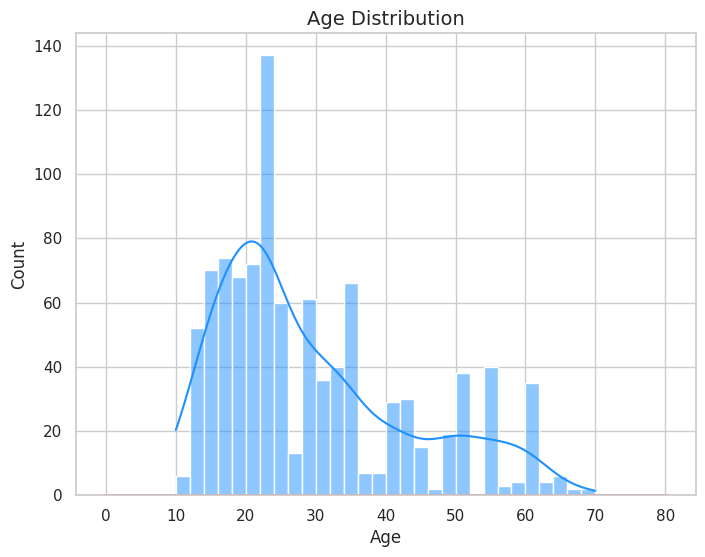

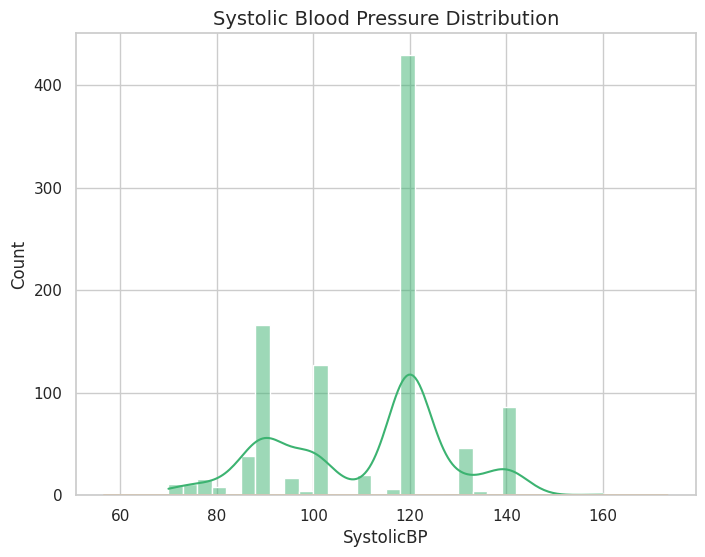

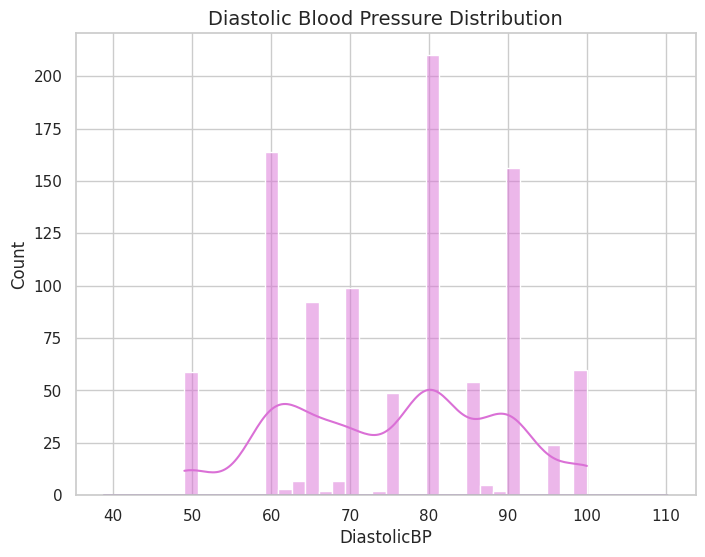

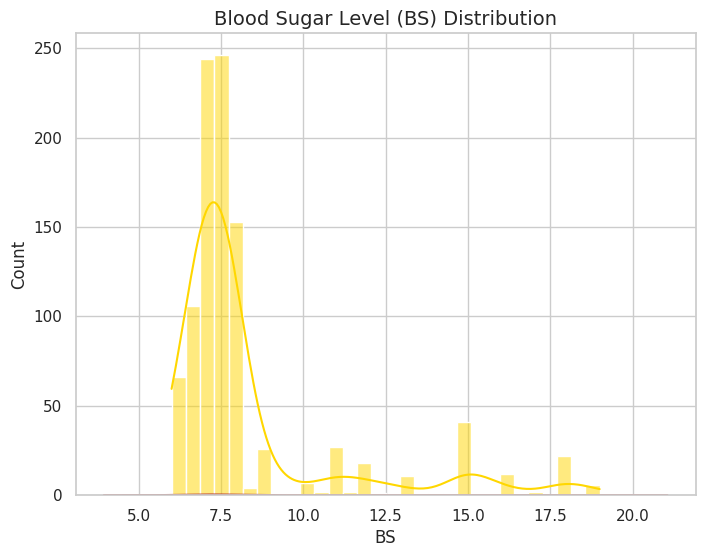

<ipython-input-31-85c295ea41ff>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['HeartRate'], palette='coolwarm')


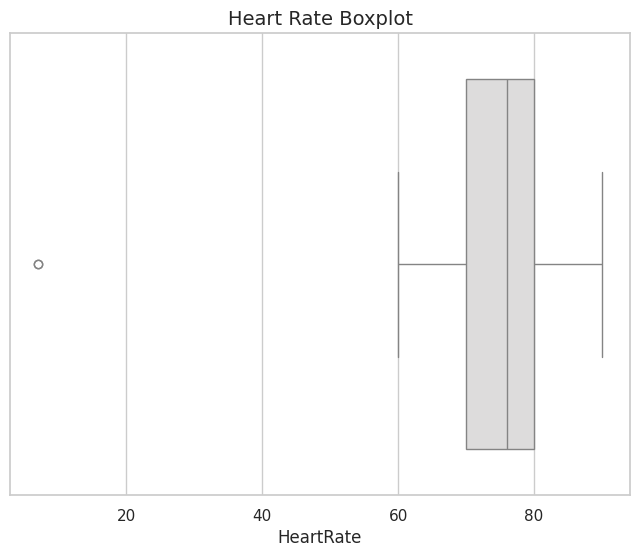

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Age Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='dodgerblue')
sns.kdeplot(data['Age'], color='red')
plt.title('Age Distribution', fontsize=14)
plt.show()

# Systolic Blood Pressure Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['SystolicBP'], kde=True, bins=30, color='mediumseagreen')
sns.kdeplot(data['SystolicBP'], color='darkorange')
plt.title('Systolic Blood Pressure Distribution', fontsize=14)
plt.show()

# Diastolic Blood Pressure Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['DiastolicBP'], kde=True, bins=30, color='orchid')
sns.kdeplot(data['DiastolicBP'], color='indigo')
plt.title('Diastolic Blood Pressure Distribution', fontsize=14)
plt.show()

# Blood Sugar Level (BS) Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['BS'], kde=True, bins=30, color='gold')
sns.kdeplot(data['BS'], color='firebrick')
plt.title('Blood Sugar Level (BS) Distribution', fontsize=14)
plt.show()

# Heart Rate Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['HeartRate'], palette='coolwarm')
plt.title('Heart Rate Boxplot', fontsize=14)
plt.show()


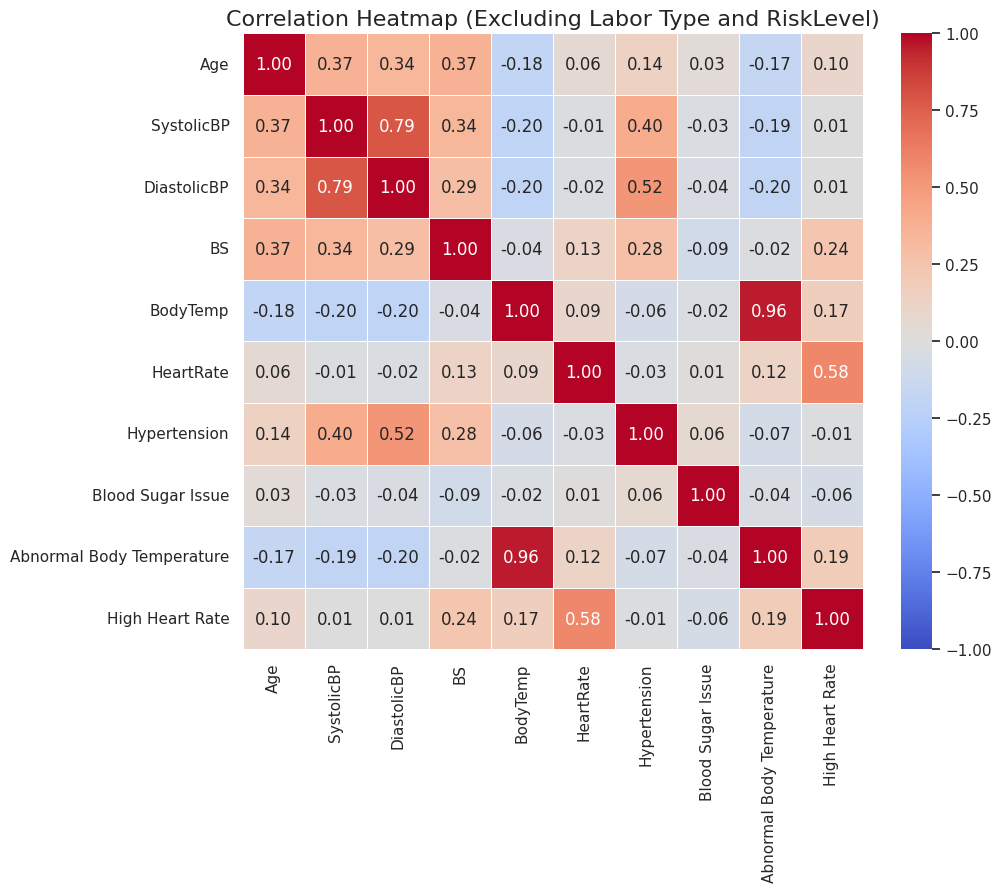

In [32]:
# Drop the columns 'Labor Type' and 'RiskLevel' before calculating the correlation matrix
corr_data = data.drop(columns=['Labor Type', 'RiskLevel'])

# Calculate the correlation matrix
corr = corr_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Excluding Labor Type and RiskLevel)', fontsize=16)
plt.show()


<Figure size 1200x1000 with 0 Axes>

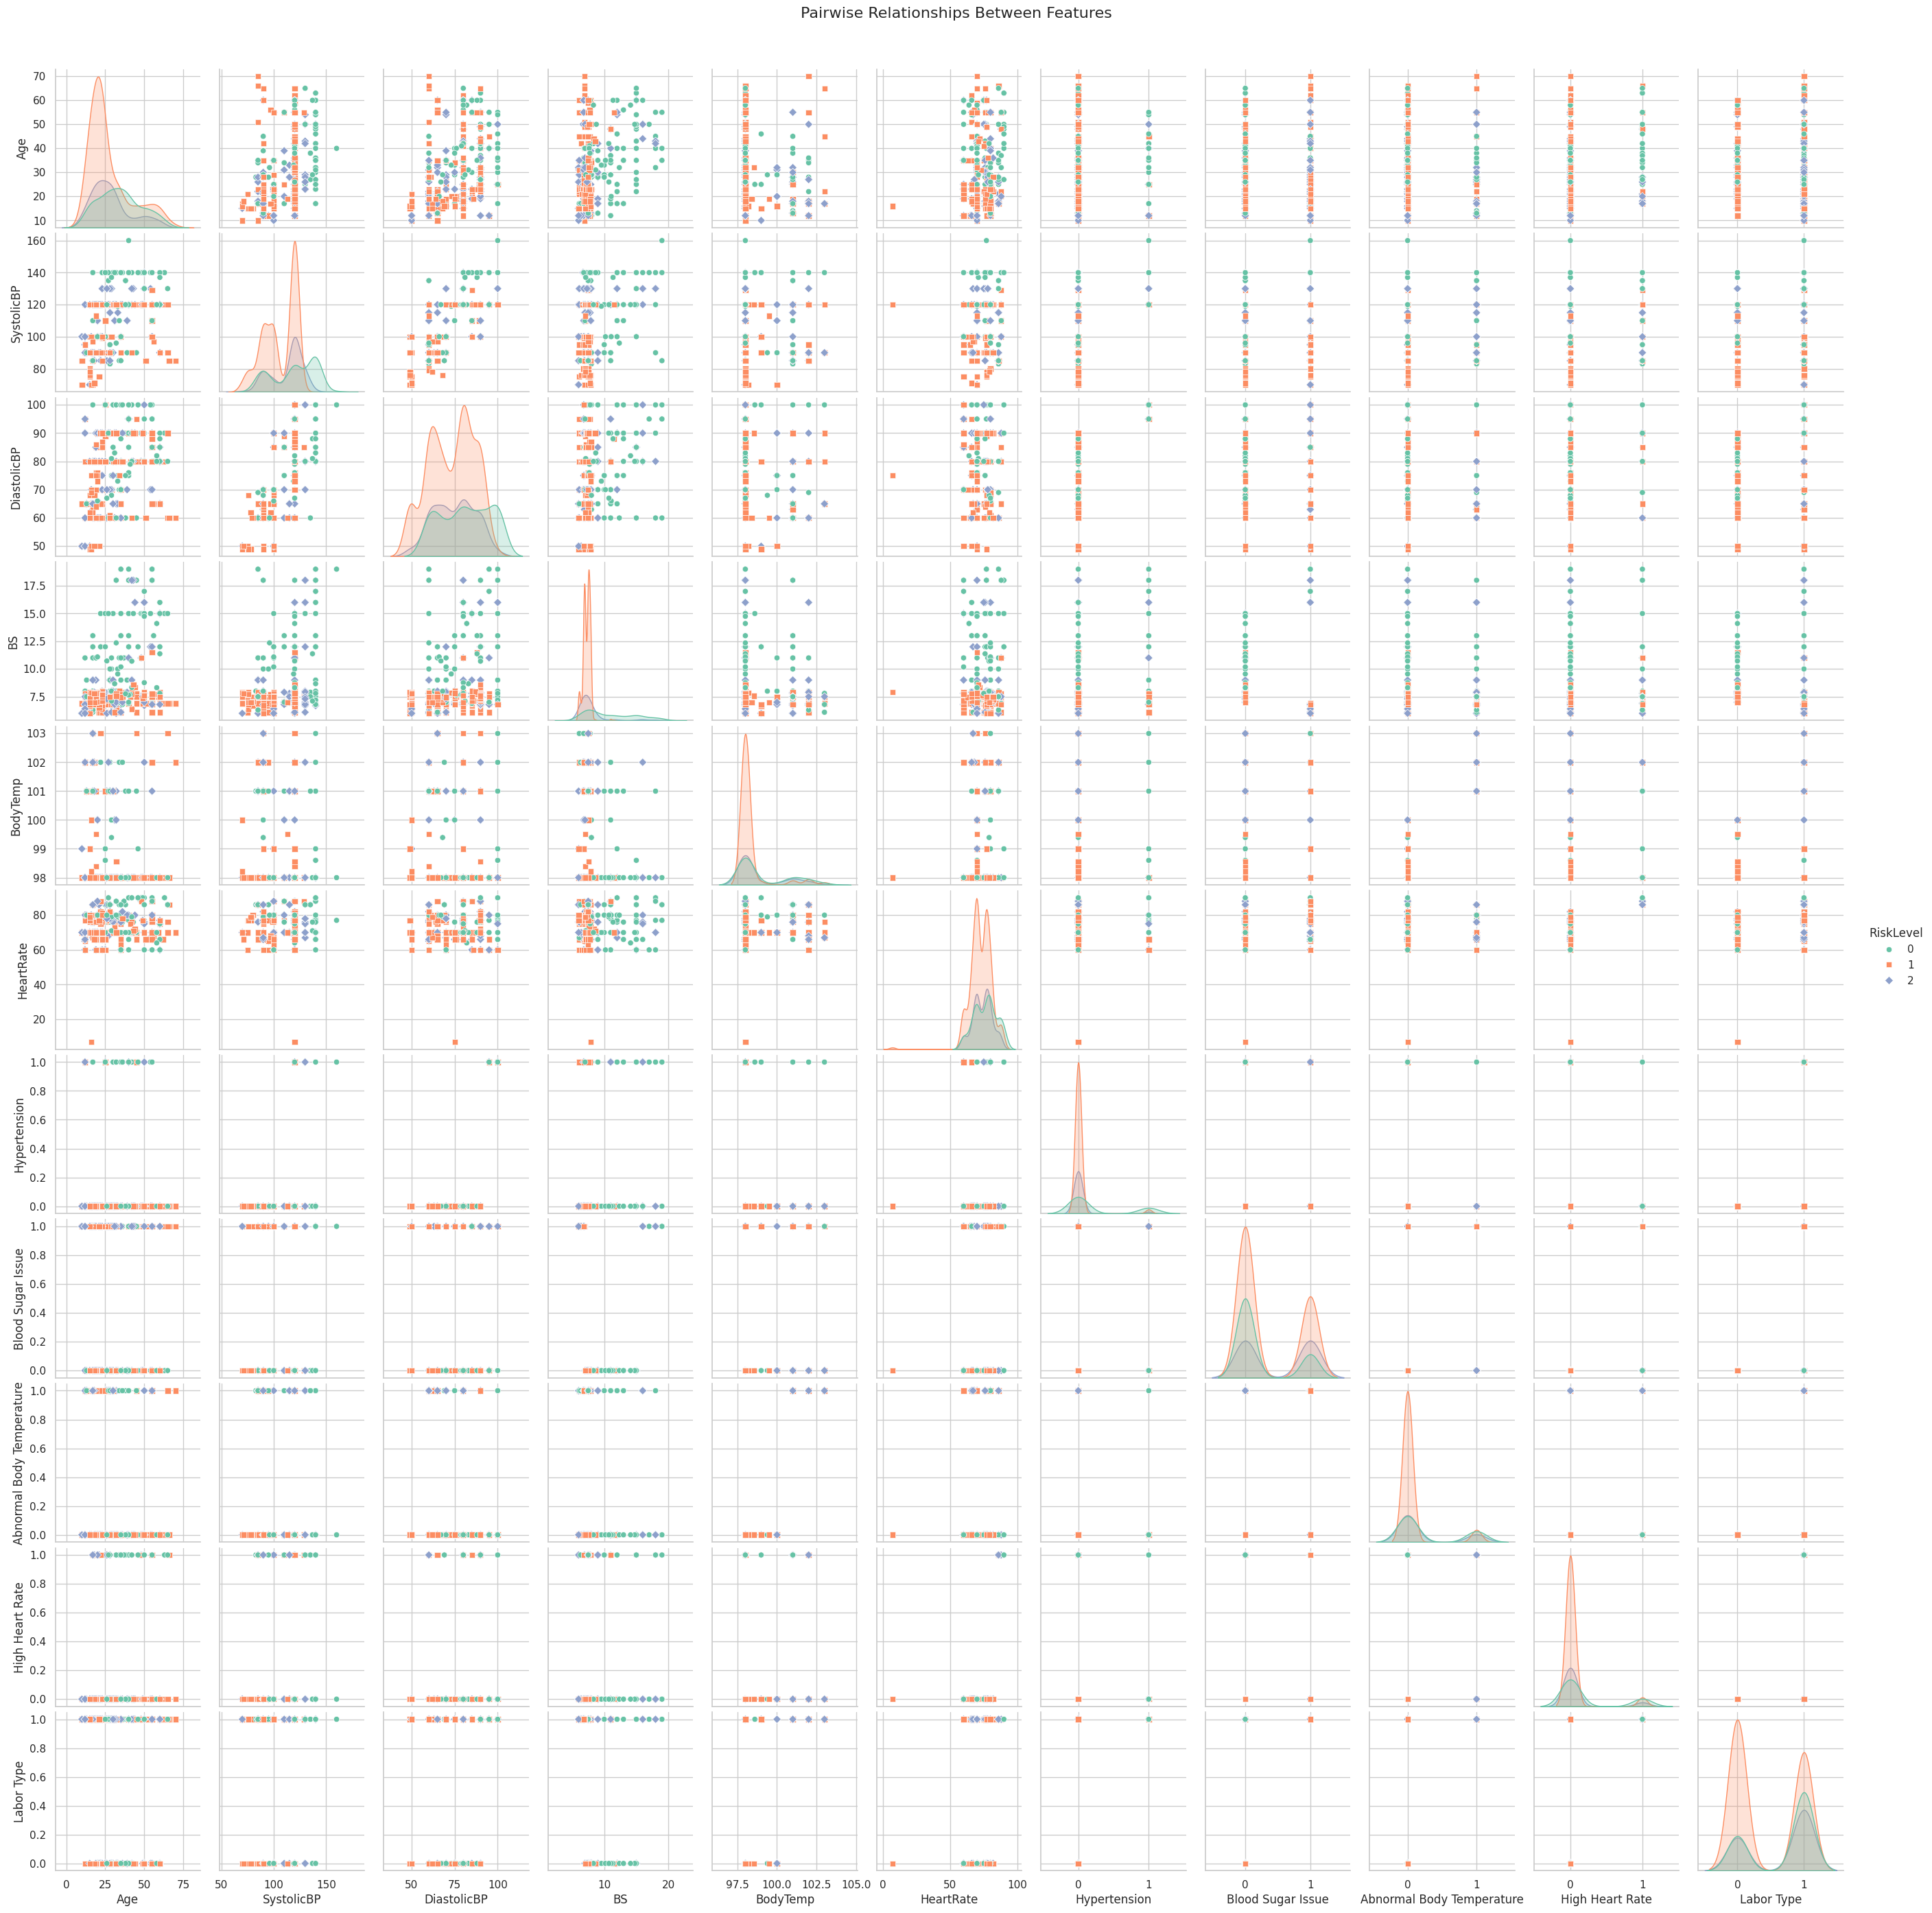

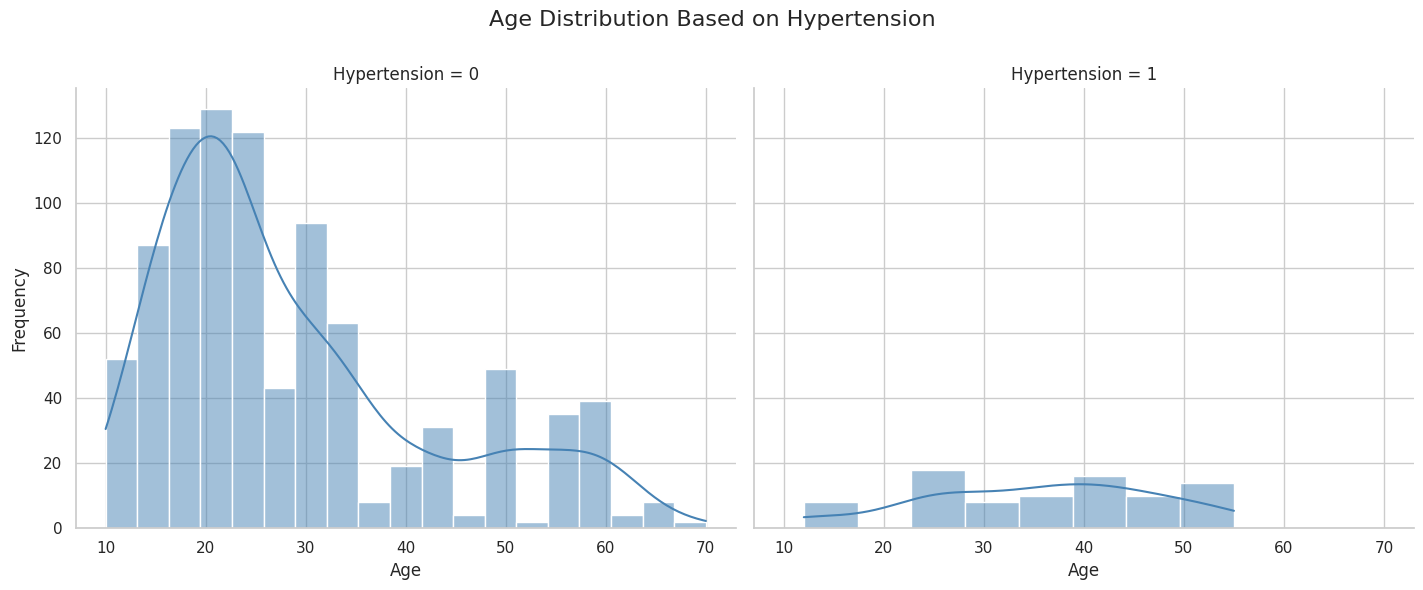

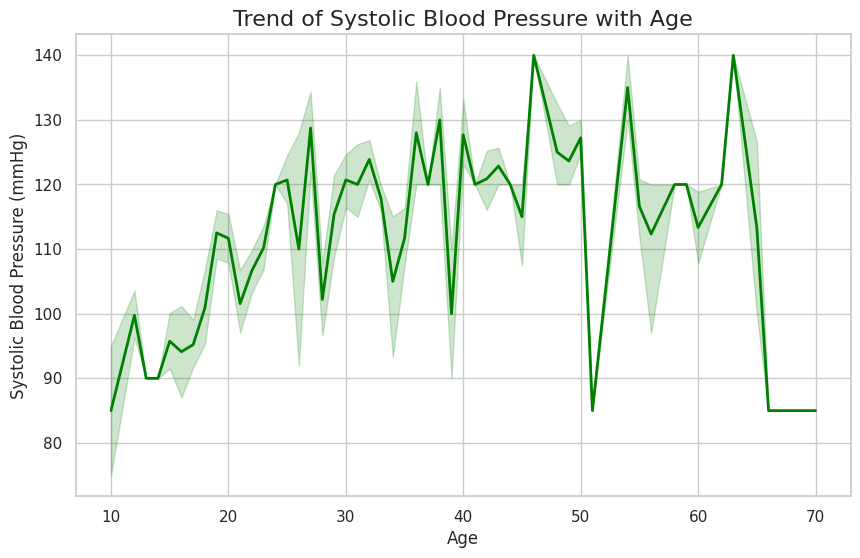

<ipython-input-33-92cfcefbbc21>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RiskLevel', y='HeartRate', data=data, palette='muted', inner='quart', scale='area')
<ipython-input-33-92cfcefbbc21>:33: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(x='RiskLevel', y='HeartRate', data=data, palette='muted', inner='quart', scale='area')


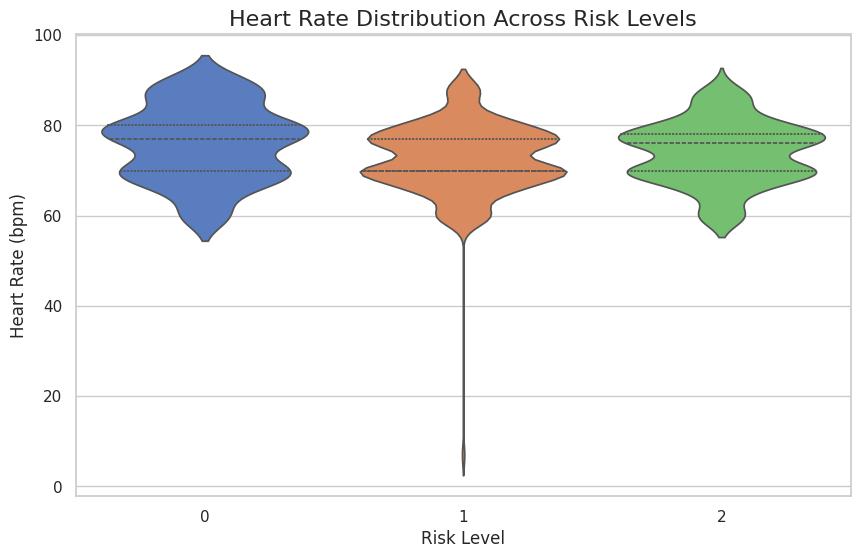

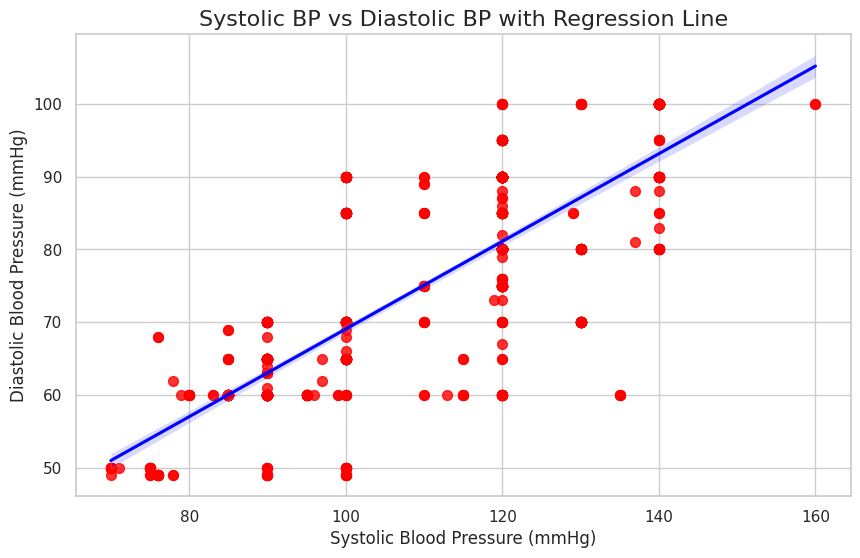

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style for vibrant, colorful plots
sns.set(style="whitegrid")

# 1. Pairplot (Pairwise Relationships)
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='RiskLevel', palette='Set2', markers=["o", "s", "D"])
plt.suptitle('Pairwise Relationships Between Features', y=1.02, fontsize=16)
plt.show()

# 2. FacetGrid for Categorical vs. Numerical Data (Example: Hypertension vs. Age)
g = sns.FacetGrid(data, col='Hypertension', height=6, aspect=1.2)
g.map(sns.histplot, 'Age', kde=True, color='steelblue')
g.set_axis_labels('Age', 'Frequency')
g.set_titles('Hypertension = {col_name}')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age Distribution Based on Hypertension', fontsize=16)
plt.show()

# 3. Line Plot for Trends (Example: Trend of SystolicBP vs. Age)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='SystolicBP', data=data, color='green', linewidth=2)
plt.title('Trend of Systolic Blood Pressure with Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Systolic Blood Pressure (mmHg)', fontsize=12)
plt.grid(True)
plt.show()

# 4. Violin Plot for Comparing Distributions Across Categories (Example: Heart Rate vs. RiskLevel)
plt.figure(figsize=(10, 6))
sns.violinplot(x='RiskLevel', y='HeartRate', data=data, palette='muted', inner='quart', scale='area')
plt.title('Heart Rate Distribution Across Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)
plt.show()

# 5. Regression Plot for Relationships Between Variables (Example: SystolicBP vs. DiastolicBP)
plt.figure(figsize=(10, 6))
sns.regplot(x='SystolicBP', y='DiastolicBP', data=data, scatter_kws={'s': 50, 'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Systolic BP vs Diastolic BP with Regression Line', fontsize=16)
plt.xlabel('Systolic Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Diastolic Blood Pressure (mmHg)', fontsize=12)
plt.show()


**Age Distribution of Individuals in the Dataset**

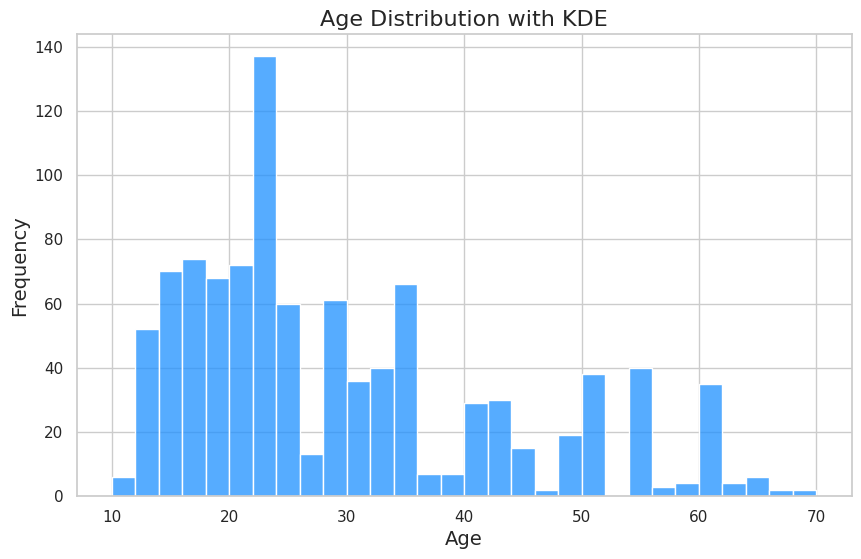

In [34]:
# Remove NaN or extreme values
data_clean = data['Age'].dropna()  # Dropping NaN values, you can also handle outliers if needed

# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Distribution plot for Age (only histogram)
sns.histplot(data_clean, bins=30, color='dodgerblue', kde=False)

# Set the title and labels
plt.title('Age Distribution with KDE', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()



**Relationship between "Systolic Blood Pressure" and "Diastolic Blood Pressure"**

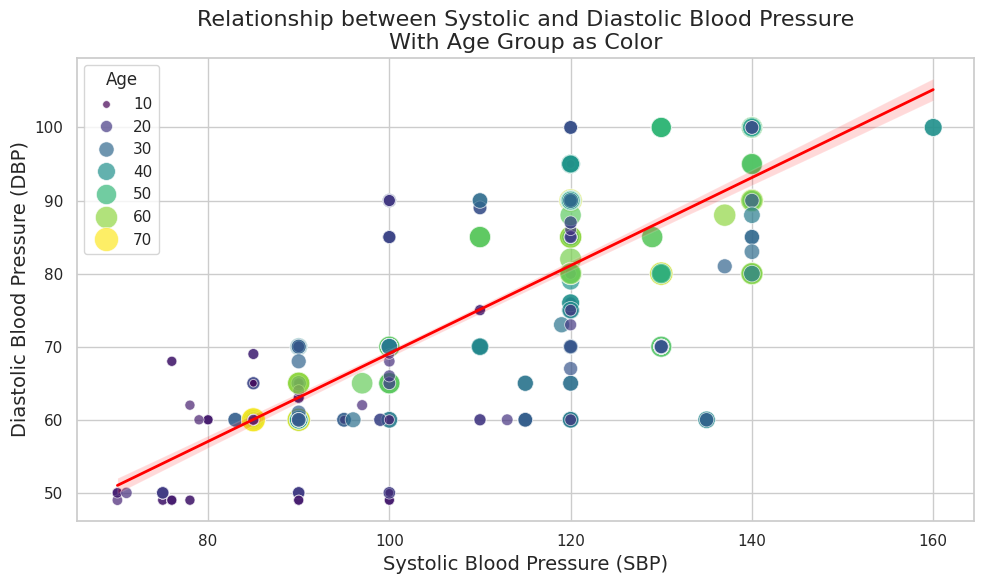

In [35]:
# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Create the scatter plot with color based on Age
plt.figure(figsize=(10, 6))

# Scatter plot with Age as color
sns.scatterplot(x=data['SystolicBP'], y=data['DiastolicBP'], hue=data['Age'], palette='viridis', size=data['Age'], sizes=(30, 300), alpha=0.7)

# Add a linear regression line to show the trend
sns.regplot(x=data['SystolicBP'], y=data['DiastolicBP'], scatter=False, color='orange', line_kws={'linewidth': 2, 'color': 'red'})

# Set the title and labels
plt.title('Relationship between Systolic and Diastolic Blood Pressure\nWith Age Group as Color', fontsize=16)
plt.xlabel('Systolic Blood Pressure (SBP)', fontsize=14)
plt.ylabel('Diastolic Blood Pressure (DBP)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


**Relation between "Blood Sugar Level (BS)" and "Heart Rate" across Different Age Groups**

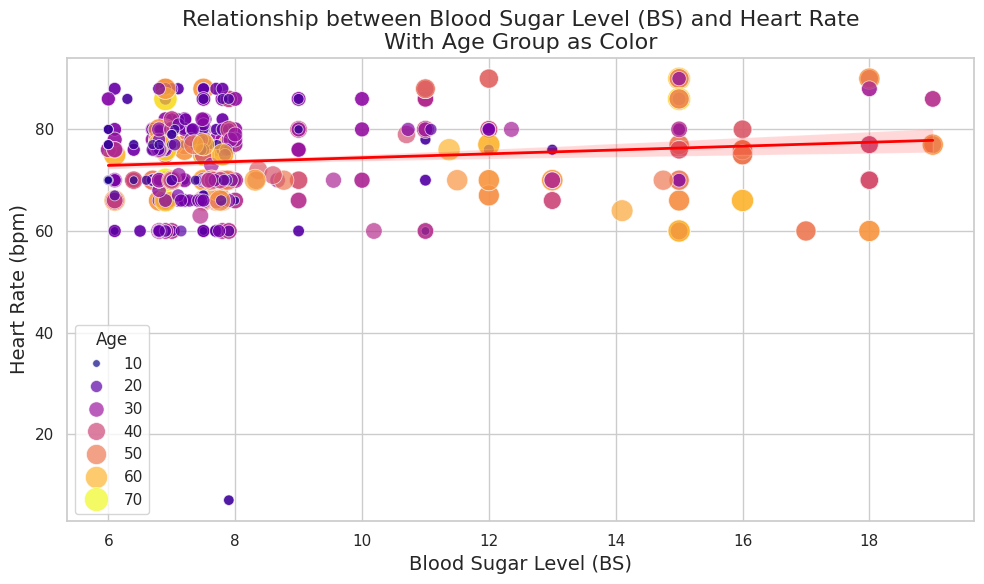

In [36]:
# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Create the scatter plot with color based on Age
plt.figure(figsize=(10, 6))

# Scatter plot with Age as color
sns.scatterplot(x=data['BS'], y=data['HeartRate'], hue=data['Age'], palette='plasma', size=data['Age'], sizes=(30, 300), alpha=0.7)

# Add a linear regression line to show the trend
sns.regplot(x=data['BS'], y=data['HeartRate'], scatter=False, color='orange', line_kws={'linewidth': 2, 'color': 'red'})

# Set the title and labels
plt.title('Relationship between Blood Sugar Level (BS) and Heart Rate\nWith Age Group as Color', fontsize=16)
plt.xlabel('Blood Sugar Level (BS)', fontsize=14)
plt.ylabel('Heart Rate (bpm)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


**Distribution of "Systolic Blood Pressure" (SystolicBP) and "Diastolic Blood Pressure" (DiastolicBP) across different "RiskLevel" categories, and is there any noticeable difference in their distributions for high-risk vs. low-risk individuals?**

<ipython-input-37-901b2e600e6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RiskLevel', y='SystolicBP', data=data, palette='coolwarm', inner="quart", linewidth=1.5)


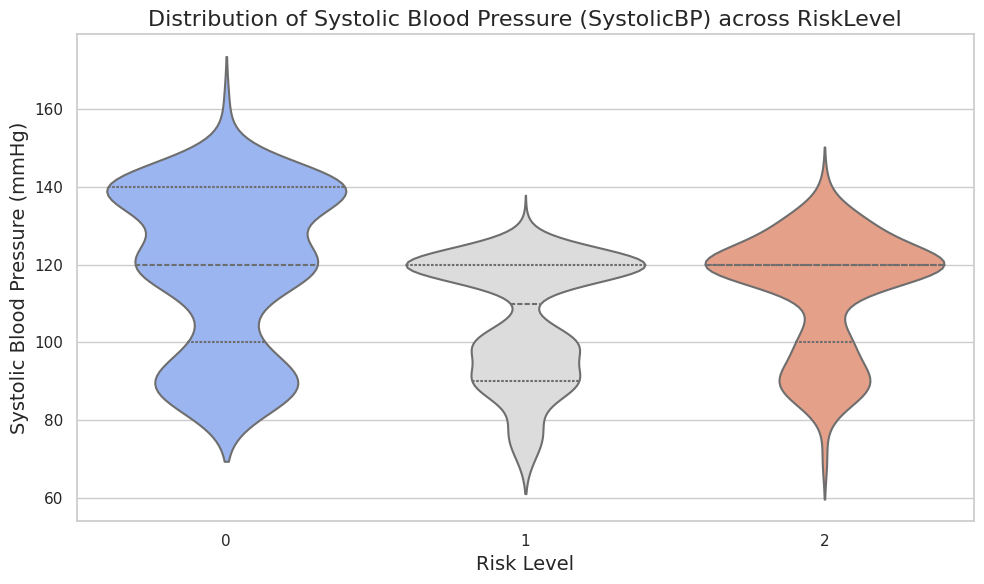

<ipython-input-37-901b2e600e6a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RiskLevel', y='DiastolicBP', data=data, palette='coolwarm', inner="quart", linewidth=1.5)


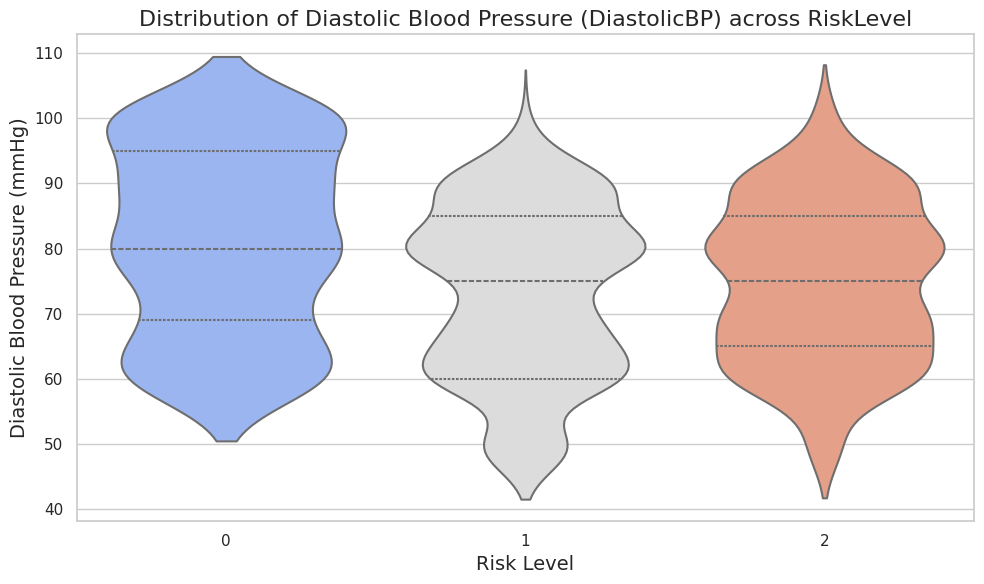

In [37]:
# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Create a figure for the distribution of Systolic Blood Pressure (SystolicBP)
plt.figure(figsize=(10, 6))

# Violin plot for Systolic Blood Pressure across RiskLevel categories
sns.violinplot(x='RiskLevel', y='SystolicBP', data=data, palette='coolwarm', inner="quart", linewidth=1.5)

# Set the title and labels
plt.title('Distribution of Systolic Blood Pressure (SystolicBP) across RiskLevel', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Systolic Blood Pressure (mmHg)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Create a figure for the distribution of Diastolic Blood Pressure (DiastolicBP)
plt.figure(figsize=(10, 6))

# Violin plot for Diastolic Blood Pressure across RiskLevel categories
sns.violinplot(x='RiskLevel', y='DiastolicBP', data=data, palette='coolwarm', inner="quart", linewidth=1.5)

# Set the title and labels
plt.title('Distribution of Diastolic Blood Pressure (DiastolicBP) across RiskLevel', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Diastolic Blood Pressure (mmHg)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


**Correlation between "Systolic Blood Pressure" (SystolicBP) & "Diastolic Blood Pressure" (DiastolicBP) w.r.t. "Age"**

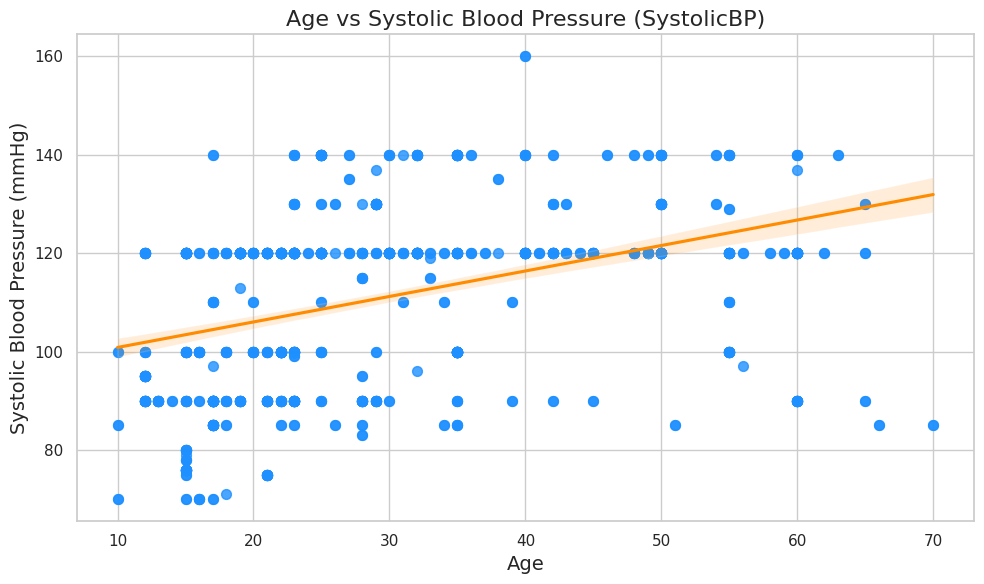

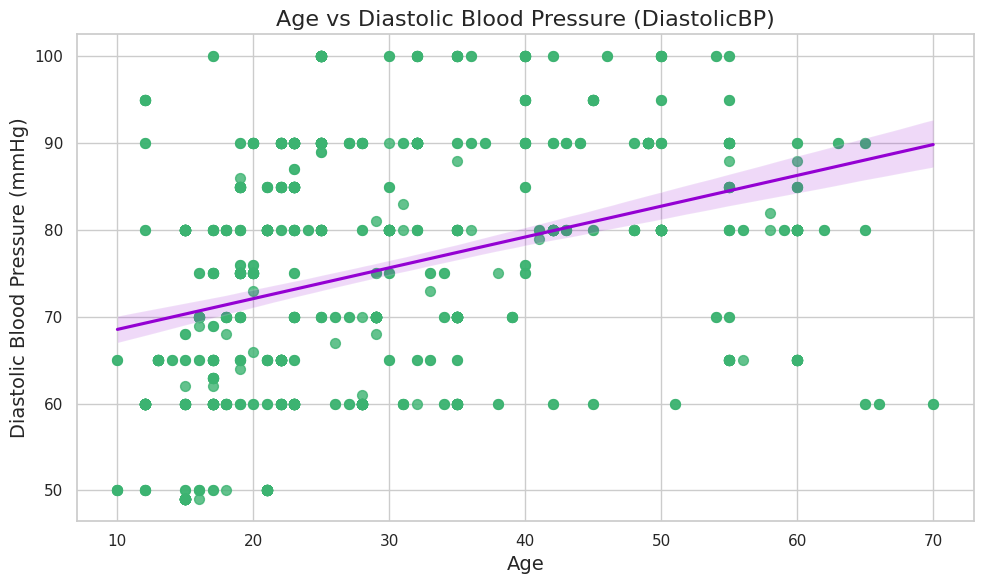

In [38]:
# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Create a figure for the Age vs. Systolic Blood Pressure relationship
plt.figure(figsize=(10, 6))

# Scatter plot with linear regression line for Age vs SystolicBP
sns.regplot(x='Age', y='SystolicBP', data=data, scatter_kws={'color': 'dodgerblue', 's': 50}, line_kws={'color': 'darkorange'}, robust=True)

# Set the title and labels
plt.title('Age vs Systolic Blood Pressure (SystolicBP)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Systolic Blood Pressure (mmHg)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Create a figure for the Age vs. Diastolic Blood Pressure relationship
plt.figure(figsize=(10, 6))

# Scatter plot with linear regression line for Age vs DiastolicBP
sns.regplot(x='Age', y='DiastolicBP', data=data, scatter_kws={'color': 'mediumseagreen', 's': 50}, line_kws={'color': 'darkviolet'}, robust=True)

# Set the title and labels
plt.title('Age vs Diastolic Blood Pressure (DiastolicBP)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Diastolic Blood Pressure (mmHg)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


**How does "HeartRate" vary with "Systolic Blood Pressure" (SystolicBP) and "Diastolic Blood Pressure" (DiastolicBP)?**

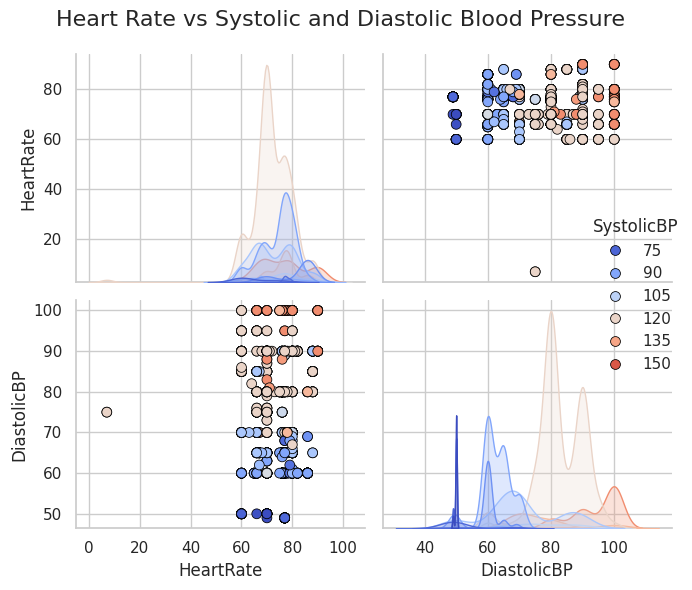

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Select the relevant columns for the pairplot
data_subset = data[['HeartRate', 'SystolicBP', 'DiastolicBP']]

# Create the pairplot with colorful aesthetics
pairplot = sns.pairplot(data_subset,
                        hue='SystolicBP',  # Color by SystolicBP to highlight different levels of blood pressure
                        palette='coolwarm',  # Use a cool-warm color palette for better visual appeal
                        markers='o',  # Circular markers
                        plot_kws={'s': 50, 'edgecolor': 'black'},  # Customize plot appearance
                        height=3)  # Size of each subplot

# Set the title for the overall plot
pairplot.fig.suptitle('Heart Rate vs Systolic and Diastolic Blood Pressure', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


**How does "Blood Sugar Level" (BS) relate to "HeartRate" and "Systolic Blood Pressure" (SystolicBP)?**

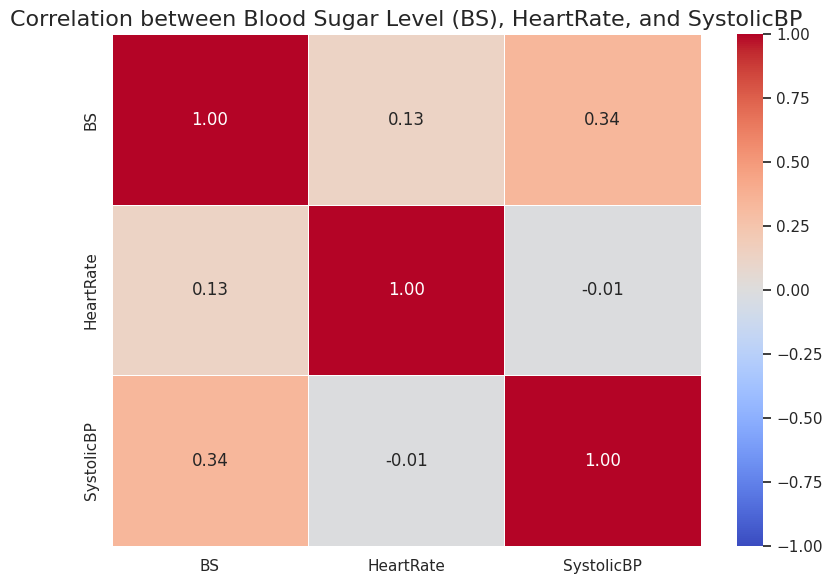

In [40]:
# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Select the relevant columns for correlation analysis
data_subset = data[['BS', 'HeartRate', 'SystolicBP']]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set the title for the heatmap
plt.title('Correlation between Blood Sugar Level (BS), HeartRate, and SystolicBP', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


**Relationship between "Age" and "Systolic Blood Pressure" (SystolicBP) across different "RiskLevel" categories**

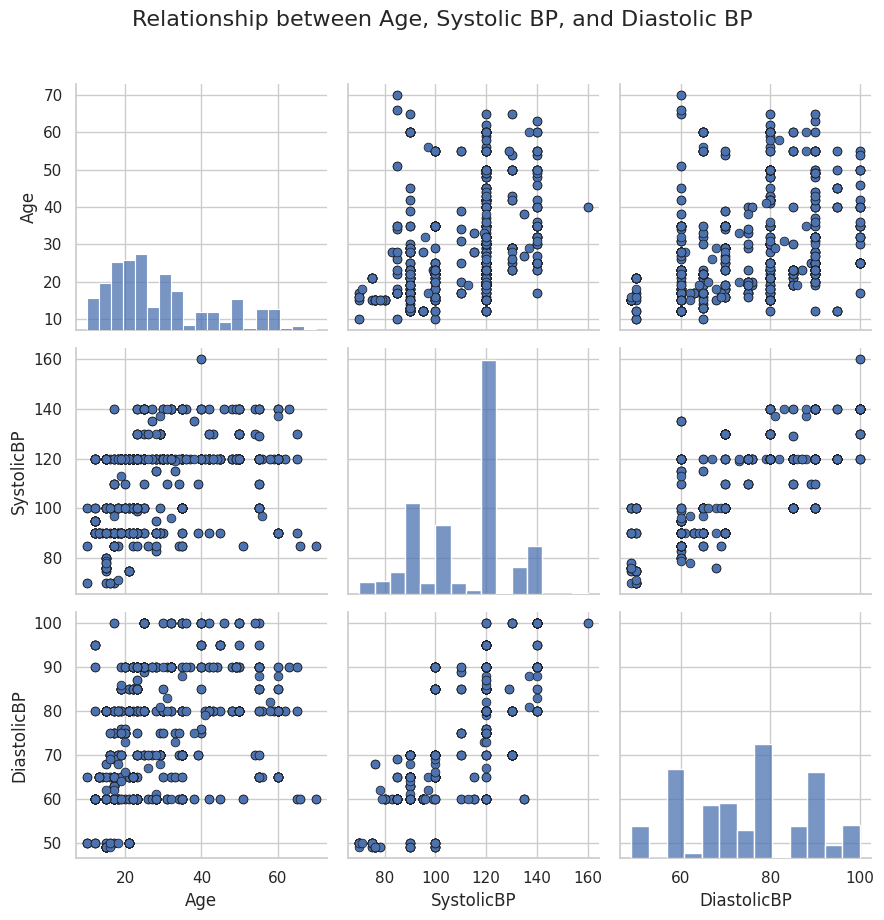

In [41]:
# Set the visual style for bright and colorful visuals
sns.set(style="whitegrid")

# Select the relevant columns for pairplot analysis
data_subset = data[['Age', 'SystolicBP', 'DiastolicBP']]

# Create the pairplot for Age, SystolicBP, and DiastolicBP
sns.pairplot(data_subset,
             kind="scatter",
             plot_kws={'s': 40, 'edgecolor': 'k'},
             palette="Set2",
             height=3)

# Set the title
plt.suptitle('Relationship between Age, Systolic BP, and Diastolic BP', fontsize=16, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()


**Prediction Analysis**

In [42]:
# Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Splitting the data
X = data.drop(['RiskLevel', 'Labor Type'], axis=1)
y_risk = data['RiskLevel']
y_labor = data['Labor Type']

# Splitting for 'Risk Level'
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X, y_risk, test_size=0.2, random_state=42)

# Splitting for 'Labor Type'
X_train_labor, X_test_labor, y_train_labor, y_test_labor = train_test_split(X, y_labor, test_size=0.2, random_state=42)

# Example: Training a Random Forest for 'Risk Level'
rf_risk = RandomForestClassifier(random_state=42)
rf_risk.fit(X_train_risk, y_train_risk)
y_pred_risk = rf_risk.predict(X_test_risk)

# Evaluation
print("Accuracy for 'Risk Level':", accuracy_score(y_test_risk, y_pred_risk))
print(classification_report(y_test_risk, y_pred_risk))

# Example: Training a Logistic Regression for 'Labor Type'
lr_labor = LogisticRegression(random_state=42, max_iter=1000)
lr_labor.fit(X_train_labor, y_train_labor)
y_pred_labor = lr_labor.predict(X_test_labor)

# Evaluation
print("Accuracy for 'Labor Type':", accuracy_score(y_test_labor, y_pred_labor))
print(classification_report(y_test_labor, y_pred_labor))


Accuracy for 'Risk Level': 0.81
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        39
           1       0.85      0.86      0.86       108
           2       0.71      0.57      0.63        53

    accuracy                           0.81       200
   macro avg       0.79      0.81      0.79       200
weighted avg       0.81      0.81      0.80       200

Accuracy for 'Labor Type': 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       111

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [43]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

# Applying SMOTE to balance the Risk Level data
smote = SMOTE(random_state=42)
X_train_risk_sm, y_train_risk_sm = smote.fit_resample(X_train_risk, y_train_risk)

# Cross-validation for the initial Random Forest model
cv_scores = cross_val_score(rf_risk, X_train_risk_sm, y_train_risk_sm, cv=5)
print("Cross-Validation Accuracy Scores for 'Risk Level':", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train_risk_sm, y_train_risk_sm)
best_model = grid_search.best_estimator_

# Evaluate best model on test data
y_pred_best = best_model.predict(X_test_risk)
print("Best Model Accuracy for 'Risk Level':", accuracy_score(y_test_risk, y_pred_best))
print(classification_report(y_test_risk, y_pred_best))


Cross-Validation Accuracy Scores for 'Risk Level': [0.84883721 0.7751938  0.89105058 0.86770428 0.88326848]
Mean CV Accuracy: 0.8532108708110879
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Model Accuracy for 'Risk Level': 0.805
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        39
           1       0.88      0.85      0.86       108
           2       0.69      0.58      0.63        53

    accuracy                           0.81       200
   macro avg       0.78      0.80      0.78       200
weighted avg       0.80      0.81      0.80       200



In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Initialize Random Forest with class weights to penalize misclassification of Class 2
rf_cost_sensitive = RandomForestClassifier(random_state=42, class_weight={0:1, 1:1, 2:3})

# Fit the cost-sensitive model
rf_cost_sensitive.fit(X_train_risk_sm, y_train_risk_sm)

# Predict and evaluate
y_pred_cost_sensitive = rf_cost_sensitive.predict(X_test_risk)
print("Cost-Sensitive Model Accuracy for 'Risk Level':", accuracy_score(y_test_risk, y_pred_cost_sensitive))
print(classification_report(y_test_risk, y_pred_cost_sensitive))


Cost-Sensitive Model Accuracy for 'Risk Level': 0.81
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        39
           1       0.89      0.84      0.87       108
           2       0.66      0.62      0.64        53

    accuracy                           0.81       200
   macro avg       0.78      0.81      0.79       200
weighted avg       0.81      0.81      0.81       200



In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost with cost-sensitive adjustments
xgb_model = XGBClassifier(scale_pos_weight={0: 1, 1: 1, 2: 3}, random_state=42)

# Fit the model
xgb_model.fit(X_train_risk_sm, y_train_risk_sm)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_risk)
print("XGBoost Model Accuracy for 'Risk Level':", accuracy_score(y_test_risk, y_pred_xgb))
print(classification_report(y_test_risk, y_pred_xgb))


XGBoost Model Accuracy for 'Risk Level': 0.805
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        39
           1       0.88      0.85      0.86       108
           2       0.69      0.58      0.63        53

    accuracy                           0.81       200
   macro avg       0.78      0.80      0.78       200
weighted avg       0.80      0.81      0.80       200



In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters for Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 3]
}

# Grid Search with 5-fold CV
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_risk_sm, y_train_risk_sm)

# Best Model Evaluation
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_risk)
print("Best XGBoost Model Accuracy for 'Risk Level':", accuracy_score(y_test_risk, y_pred_best_xgb))
print(classification_report(y_test_risk, y_pred_best_xgb))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost Model Accuracy for 'Risk Level': 0.795
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        39
           1       0.87      0.83      0.85       108
           2       0.66      0.58      0.62        53

    accuracy                           0.80       200
   macro avg       0.76      0.80      0.78       200
weighted avg       0.79      0.80      0.79       200



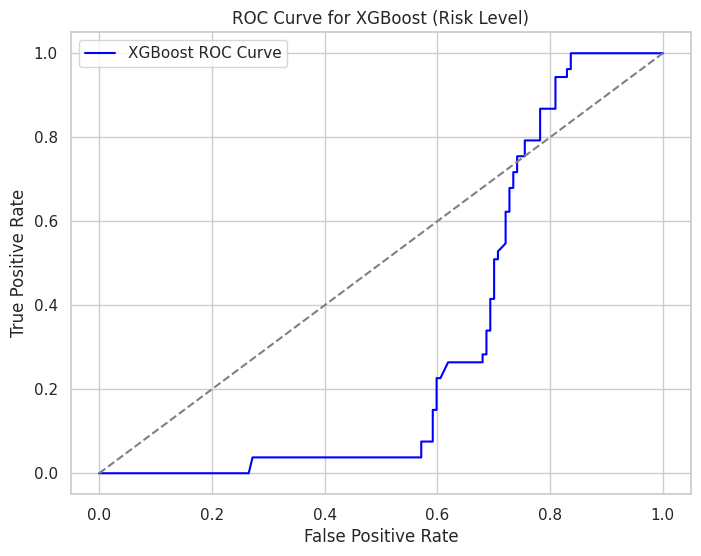

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC Curve
y_prob_xgb = best_xgb.predict_proba(X_test_risk)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test_risk, y_prob_xgb, pos_label=2)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='XGBoost ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost (Risk Level)')
plt.legend()
plt.show()


In [48]:
!pip install shap